### California Housing
- use a dataset from sklearn (https://scikit-learn.org/dev/datasets/real_world.html#california-housing-dataset)
- apply knowledge to import, review, describe, clean and also handle with missing data 
- attribute information (8 predictive attribures and the target column)
    - MedInc median income in block group, measured in tens of thousands of dollars
    - HouseAge median house age in block group
    - AveRooms average number of rooms per household
    - AveBedrms average number of bedrooms per household
    - Population block group population
    - AveOccup average number of household members
    - Latitude block group latitude
    - Longitude block group longitude
    - Target the median house price for household, measured in hundreds of thousands of dollas (eg. 1 means $100,000)

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

In [2]:
# check data

ca_housing = fetch_california_housing()
print(ca_housing.data.shape, ca_housing.target.shape)

(20640, 8) (20640,)


In [3]:
print(ca_housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
len(ca_housing.feature_names)

8

In [5]:
# import data to a dataframe

data = pd.DataFrame(data = np.c_[ca_housing['data'], ca_housing['target']], columns = ca_housing['feature_names'] + ['target'])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
data.shape

(20640, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### <font color='Green'>Review data</font>

- There is no missing value.
- It is a scew as the dispersion from 6.052381 to 141.909091 in AveRooms (average number of bedrooms per household) column.
- It is a scew as the dispersion from 1725.000000 to 35682.000000 in Population (block group population) column.
- It is a scew as the dispersion from 3.282261 to 1243.333333 in AveOccup (average number of household members) column.
- As a gap between the min and max of HouseAge, AveRooms, AveBedrms, Population, and AveOccup, data maybe scew or there is  the outlier over there


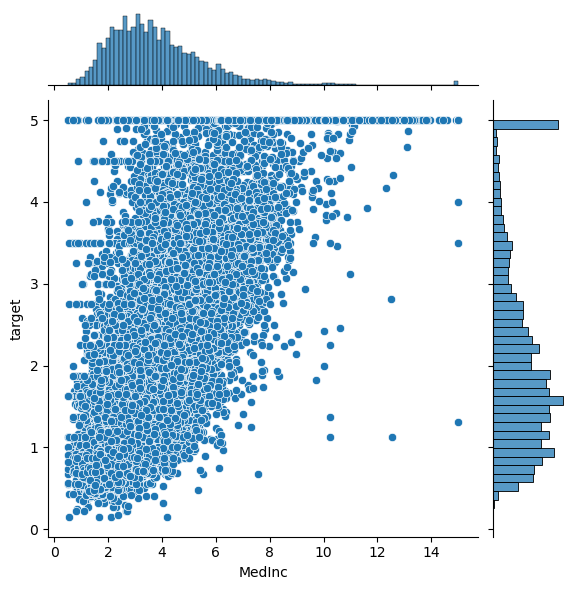

In [9]:
# let's plot

sns.jointplot(data = data, x = 'MedInc', y = 'target');

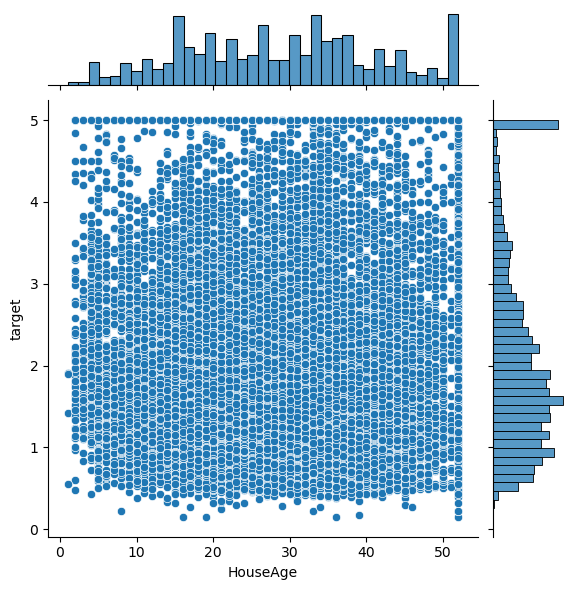

In [10]:
sns.jointplot(data = data, x = 'HouseAge', y = 'target');

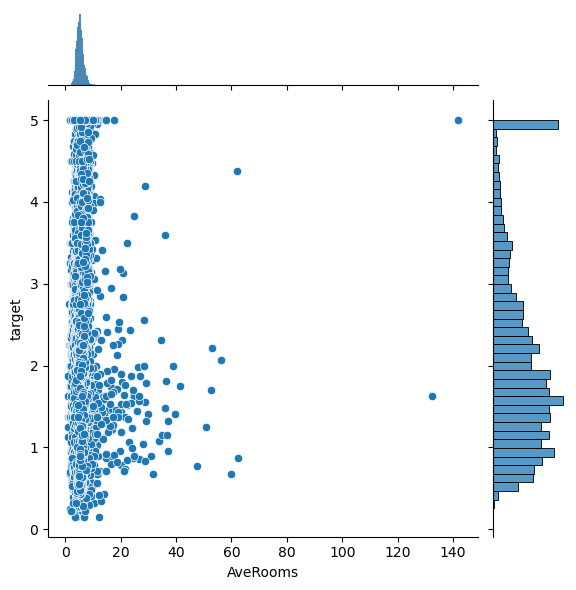

In [11]:
sns.jointplot(data = data, x = 'AveRooms', y = 'target');

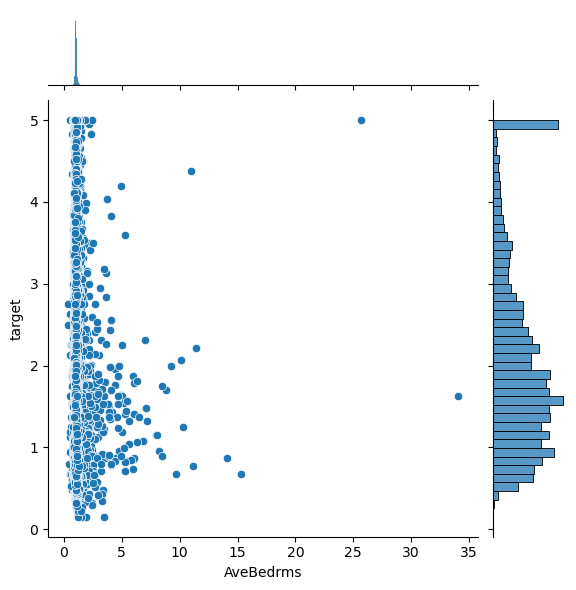

In [12]:
sns.jointplot(data = data, x = 'AveBedrms', y = 'target');

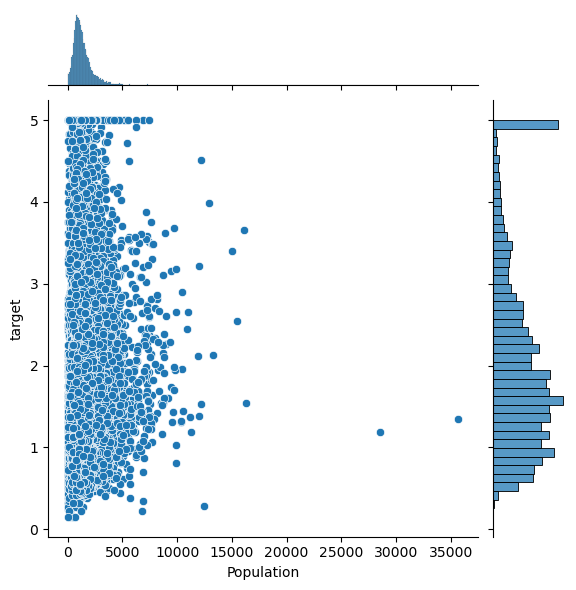

In [13]:
sns.jointplot(data = data, x = 'Population', y = 'target');

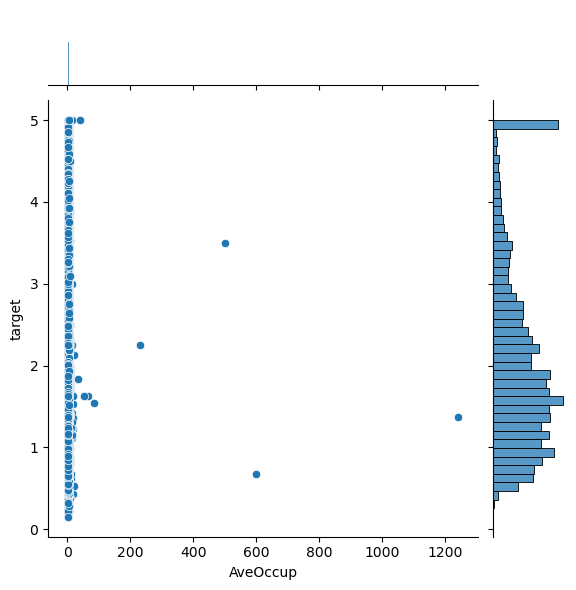

In [14]:
sns.jointplot(data = data, x = 'AveOccup', y = 'target');

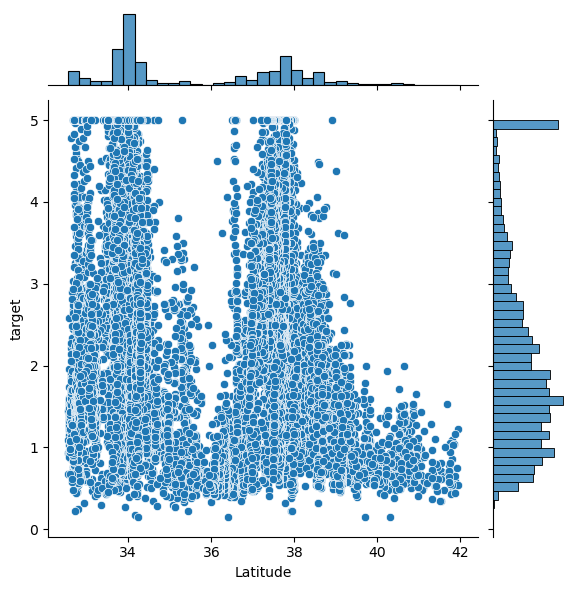

In [15]:
sns.jointplot(data = data, x = 'Latitude', y = 'target');

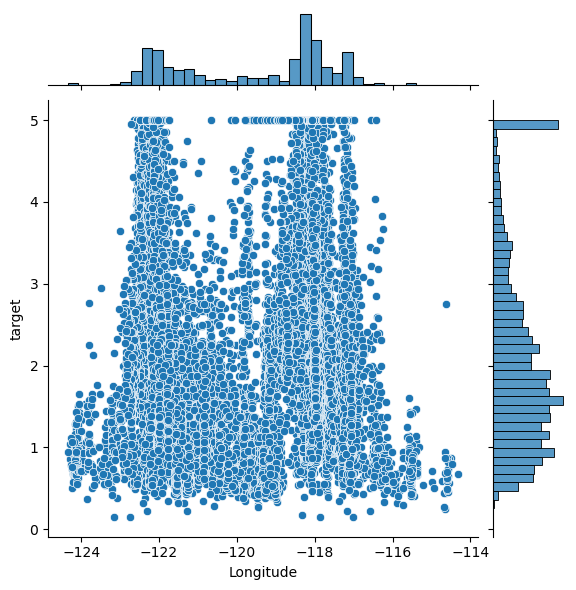

In [16]:
sns.jointplot(data = data, x = 'Longitude', y = 'target');

In [17]:
# Please note that we can view the categorical variable by using countplot

# sns.countplot(data = data, x = 'variable/column name');

#### <font color='Green'>Review data</font>

- There are outliers data in MidInc, AveRooms, AveBedrms, Population, and AveOccup.
- Scewness or outliers in AveRooms, AveBedrms, Population, and AveOccup

#### Let's handle with the outlier

- Outlier causes
    - Natural variability
    - Data entry errors
    - Sampling errors
    - Measurement errors
    - Experimental errors
    - Intentional outliers
- Outlier impact
    - It is increases the error variance and reduces the power of statistical tests
- Outlier detection 
    - Visualization methods - scatter plot, histogram, or box plots
- Removal method
    - Impute outliers - impute all values above 3P99 and below 0.3P1, or  nay multiplier instead of 3 depends on business requirement
    - Extrapolate curve between P95 and P99, and then capure all values falling outside to the value generated by the curve
    - Extrapolate curve between P5 and P1
    - Indentify outliers by capturing all values falling outside mu +- xSigma, then we can use any multiplier as x as per business requirement


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


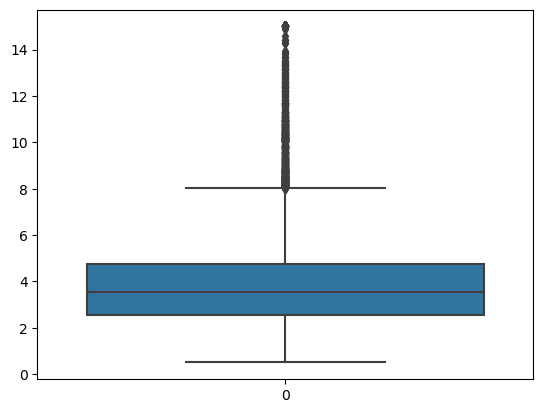

In [19]:
sns.boxplot(data['MedInc']);

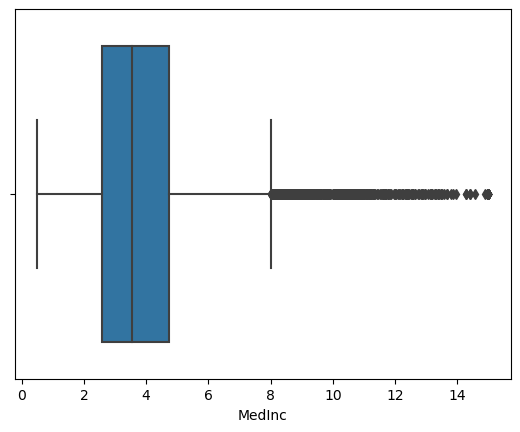

In [20]:
sns.boxplot(data = data, x = data['MedInc']);

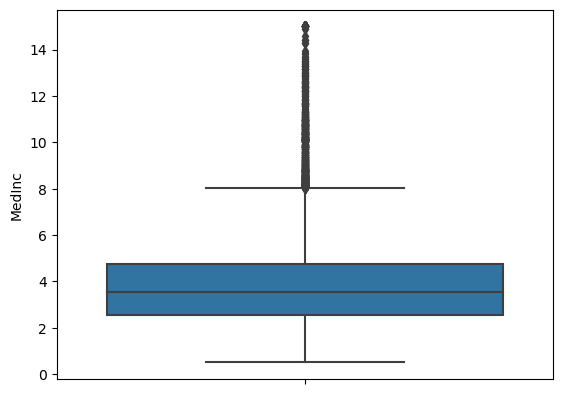

In [21]:
sns.boxplot(data = data, y = data['MedInc']);

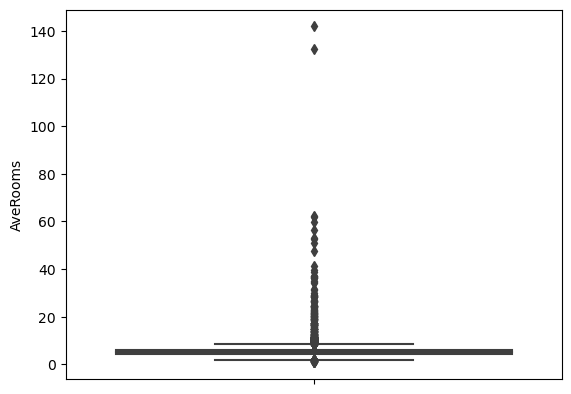

In [22]:
sns.boxplot(data = data, y = data['AveRooms']);

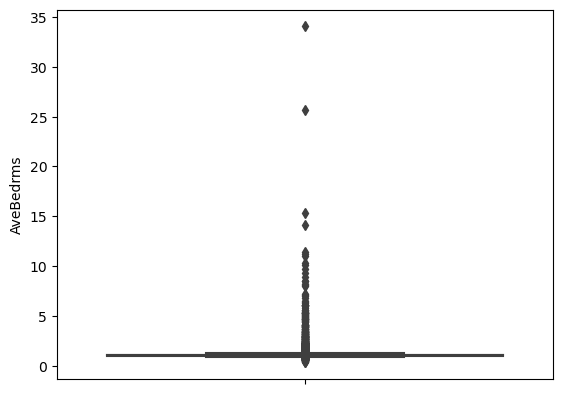

In [23]:
sns.boxplot(data = data, y = data['AveBedrms']);

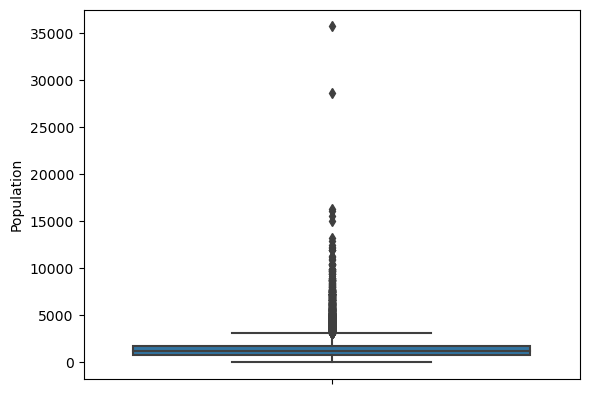

In [24]:
sns.boxplot(data = data, y = data['Population']);

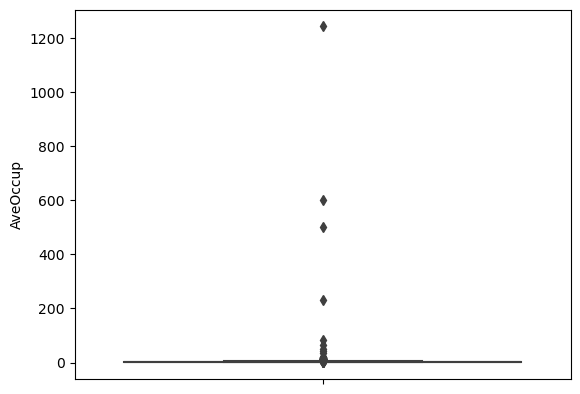

In [25]:
sns.boxplot(data = data, y = data['AveOccup']);

In [26]:
# let's check the value at 99 percentile

np.percentile(data['Population'], [99])

array([5805.83])

In [27]:
# Let's check the location of array

np.percentile(data.Population, [99]).shape

(1,)

In [28]:
# Let's fetch the first element of array

np.percentile(data.Population, [99])[0]

5805.830000000002

In [29]:
# then we save value at the 99 percentile to a new uv (upper value) variable

uv = np.percentile(data.Population, [99])[0]
uv

5805.830000000002

In [30]:
# let's see the above value data

data[(data.Population > uv)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
570,7.6110,5.0,6.855776,1.061442,7427.0,2.732524,37.72,-122.24,3.507
864,5.8322,14.0,5.689849,1.051282,8117.0,2.851071,37.57,-122.01,2.818
865,5.6277,14.0,5.724098,1.039140,8012.0,3.074444,37.58,-122.04,2.698
869,6.1047,7.0,5.925431,1.011686,6075.0,3.380634,37.57,-122.05,2.782
871,6.0824,3.0,5.090447,1.039230,7205.0,2.617145,37.52,-122.07,2.735
...,...,...,...,...,...,...,...,...,...
20451,6.9712,5.0,7.241806,1.012363,11956.0,3.437608,34.26,-118.90,3.213
20530,3.1371,11.0,5.070223,1.015530,7984.0,2.695476,38.57,-121.76,2.018
20544,2.0650,23.0,4.803493,1.013646,6330.0,3.455240,38.55,-121.76,2.194
20563,3.1250,9.0,5.148007,1.119593,6837.0,2.899491,38.67,-121.75,1.325


In [31]:
len(data[(data.Population > uv)])

207

In [32]:
# let's check, fetch and save the value below the 1st percentile

np.percentile(data['Population'], [1])

array([88.])

In [33]:
lv = np.percentile(data['Population'], [1])[0]
lv

88.0

In [34]:
data[(data.Population < lv)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
61,6.1183,49.0,5.869565,1.260870,86.0,3.739130,37.82,-122.29,0.750
73,0.4999,46.0,1.714286,0.571429,18.0,2.571429,37.81,-122.29,0.675
700,6.5000,20.0,6.451613,0.806452,83.0,2.677419,37.69,-122.03,3.400
779,2.3750,26.0,6.480000,1.080000,86.0,3.440000,37.65,-122.12,1.375
986,10.3203,43.0,5.428571,0.952381,83.0,1.976190,37.72,-121.85,4.000
...,...,...,...,...,...,...,...,...,...
20248,8.0000,28.0,2.888889,0.333333,29.0,3.222222,34.25,-119.23,2.750
20349,7.3004,32.0,5.724138,0.758621,63.0,2.172414,34.17,-119.08,1.250
20353,5.0066,12.0,3.800000,1.466667,69.0,4.600000,34.13,-119.05,2.750
20502,2.9821,45.0,4.481481,0.925926,67.0,2.481481,34.33,-118.68,3.250


In [35]:
len(data[(data.Population < lv)])

205

In [36]:
# let's handle with the upper and lower values

data['Population'][(data.Population > 3*uv)] = 3*uv
data['Population'][(data.Population < 0.3*lv)] = 0.3*lv

In [37]:
data[(data.Population < lv)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
61,6.1183,49.0,5.869565,1.260870,86.0,3.739130,37.82,-122.29,0.750
73,0.4999,46.0,1.714286,0.571429,26.4,2.571429,37.81,-122.29,0.675
700,6.5000,20.0,6.451613,0.806452,83.0,2.677419,37.69,-122.03,3.400
779,2.3750,26.0,6.480000,1.080000,86.0,3.440000,37.65,-122.12,1.375
986,10.3203,43.0,5.428571,0.952381,83.0,1.976190,37.72,-121.85,4.000
...,...,...,...,...,...,...,...,...,...
20248,8.0000,28.0,2.888889,0.333333,29.0,3.222222,34.25,-119.23,2.750
20349,7.3004,32.0,5.724138,0.758621,63.0,2.172414,34.17,-119.08,1.250
20353,5.0066,12.0,3.800000,1.466667,69.0,4.600000,34.13,-119.05,2.750
20502,2.9821,45.0,4.481481,0.925926,67.0,2.481481,34.33,-118.68,3.250


In [38]:
data[(data.Population > uv)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
570,7.6110,5.0,6.855776,1.061442,7427.0,2.732524,37.72,-122.24,3.507
864,5.8322,14.0,5.689849,1.051282,8117.0,2.851071,37.57,-122.01,2.818
865,5.6277,14.0,5.724098,1.039140,8012.0,3.074444,37.58,-122.04,2.698
869,6.1047,7.0,5.925431,1.011686,6075.0,3.380634,37.57,-122.05,2.782
871,6.0824,3.0,5.090447,1.039230,7205.0,2.617145,37.52,-122.07,2.735
...,...,...,...,...,...,...,...,...,...
20451,6.9712,5.0,7.241806,1.012363,11956.0,3.437608,34.26,-118.90,3.213
20530,3.1371,11.0,5.070223,1.015530,7984.0,2.695476,38.57,-121.76,2.018
20544,2.0650,23.0,4.803493,1.013646,6330.0,3.455240,38.55,-121.76,2.194
20563,3.1250,9.0,5.148007,1.119593,6837.0,2.899491,38.67,-121.75,1.325


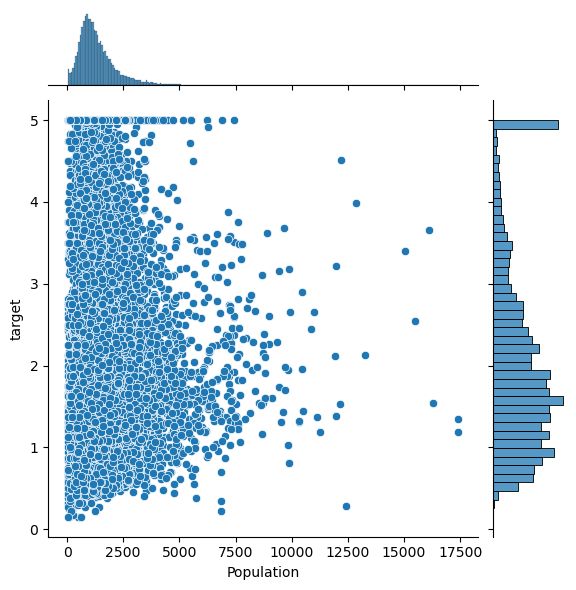

In [39]:
# plot 

sns.jointplot(data = data, x = 'Population', y = 'target');

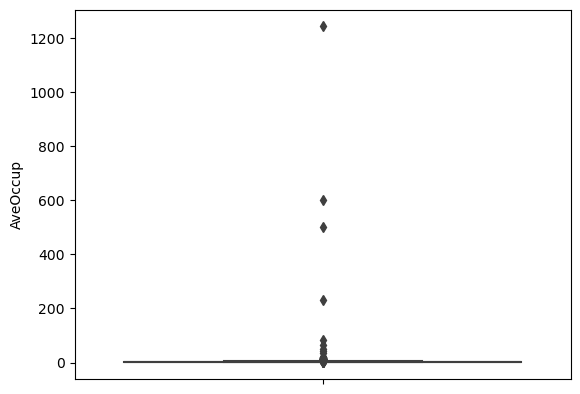

In [40]:
# let's remove value above an value referring the boxplot

sns.boxplot(data = data, y = data['AveOccup']);

In [41]:
# create a function to eliminate the value above a specific value which is acting as an outlier

def remove_outlier_boxplot(df, column, thredshold):
    
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot with Outlier of {column}') # show the box plot using the original data
    plt.show()

    removed_outliers = df[df[column] <= thredshold] 

    sns.boxplot(removed_outliers[column])
    plt.title(f'New Box Plot without Outlier of {column}') # show the box plot using the original data
    plt.show()
    
    return removed_outliers

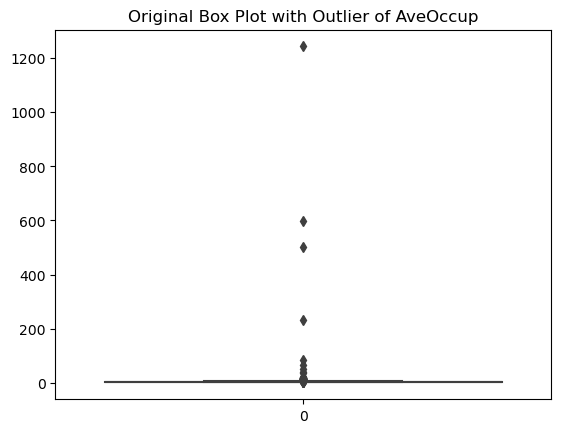

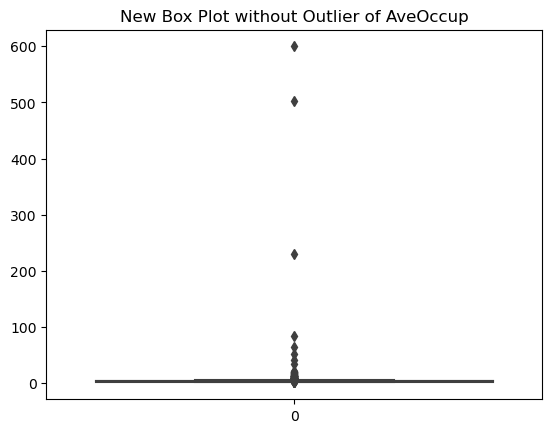

In [42]:
# call a function

threshold_value = 1200

no_outlier = remove_outlier_boxplot(df = data, column = 'AveOccup', thredshold = threshold_value)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [44]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1424.070852,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1102.110844,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,26.400000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,17417.490000,1243.333333,41.950000,-114.310000,5.000010


#### <font color='Green'>Work with Machine Learning (ML)</font>

- We would like to showed the review and cleaning data as per above process.
- We are going to use the original data to do Ml.

In [45]:
# import libraries

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
# load data

ca_housing2 = fetch_california_housing()
type(ca_housing2)

sklearn.utils._bunch.Bunch

In [47]:
# separate California housing data into input X, and target y

X = ca_housing2.data
X[:5]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])

In [48]:
len(X)

20640

In [49]:
type(X)

numpy.ndarray

In [50]:
y = ca_housing2.target
y[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [51]:
len(y)

20640

In [52]:
type(y)

numpy.ndarray

In [53]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42) # 80% of data for training and 20% of data for testing
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [54]:
multi_reg_model = LinearRegression() # create a model
multi_reg_model 

LinearRegression()

In [55]:
multi_reg_model.fit(X, y) # train a model

LinearRegression()

In [56]:
multi_reg_model.score(X, y) # get R-Square score

0.6062326851998051

In [57]:
multi_reg_model.intercept_

-36.94192020718442

In [58]:
multi_reg_model.coef_ # get X Coeficient

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [59]:
# test the model

y_hat = multi_reg_model.predict(X_test)
y_hat[:5]

array([0.73633618, 1.76125512, 2.67242971, 2.84365656, 2.61730971])

In [60]:
len(y_hat)

4128

In [63]:
dc = pd.concat([pd.DataFrame(X_test, columns = ca_housing['feature_names']), pd.DataFrame(y_test, columns = ['target']), pd.Series(y_hat, name = 'predicted')], axis = 'columns') # for beautiful view data that we will see the real y (Sales) and the predicted values
dc

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,predicted
0,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700,0.736336
1,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800,1.761255
2,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001,2.672430
3,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600,2.843657
4,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000,2.617310
...,...,...,...,...,...,...,...,...,...,...
4123,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22,2.63300,2.018378
4124,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83,2.66800,2.254756
4125,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05,5.00001,4.455095
4126,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76,0.72300,1.211464


In [66]:
# import libraries

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [67]:
# formula: response + predictor1 + predictor2

model_a = smf.ols(formula = 'target ~ MedInc + HouseAge - AveRooms + AveBedrms - Population - AveOccup - Latitude - Longitude', data = dc[:20640]).fit() # to get model in R style

In [68]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1344.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:34:47   Log-Likelihood:                -5008.2
No. Observations:                4128   AIC:                         1.002e+04
Df Residuals:                    4124   BIC:                         1.005e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0651      0.050     -1.299      0.1

In [69]:
model_a.params # get coef

Intercept   -0.065087
MedInc       0.424613
HouseAge     0.017267
AveBedrms   -0.002731
dtype: float64

In [70]:
model_a.pvalues # views more digit of p-value

Intercept    1.939402e-01
MedInc       0.000000e+00
HouseAge     3.644470e-62
AveBedrms    8.956744e-01
dtype: float64